___

<a href='http://www.pieriandata.com'> <img src='../Pierian_Data_Logo.png' /></a>
___

# Finance Data Project 

In this data project we will focus on exploratory data analysis of stock prices. Keep in mind, this project is just meant to practice your visualization and pandas skills, it is not meant to be a robust financial analysis or be taken as financial advice.
____
**NOTE: This project is extremely challenging because it will introduce a lot of new concepts and have you looking things up on your own (we'll point you in the right direction) to try to solve the tasks issued. Feel free to just go through the solutions lecture notebook and video as a "walkthrough" project if you don't want to have to look things up yourself. You'll still learn a lot that way!**
____
We'll focus on bank stocks and see how they progressed throughout the [financial crisis](https://en.wikipedia.org/wiki/Financial_crisis_of_2007%E2%80%9308) all the way to early 2016.

## Get the Data

In this section we will learn how to use pandas to directly read data from Google finance using pandas!

First we need to start with the proper imports, which we've already laid out for you here.

*Note: [You'll need to install pandas-datareader for this to work!](https://github.com/pydata/pandas-datareader) Pandas datareader allows you to [read stock information directly from the internet](http://pandas.pydata.org/pandas-docs/stable/remote_data.html) Use these links for install guidance (**pip install pandas-datareader**), or just follow along with the video lecture.*

### The Imports

Already filled out for you.

In [1]:
#from pandas_datareader import data, wb
#import os
import pandas_datareader as pdr
import pandas as pd
import numpy as np
%matplotlib inline

C:\Users\kpfra\Anaconda3\lib\site-packages\pandas_datareader\compat\__init__.py:7: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  from pandas.util.testing import assert_frame_equal


## Data

We need to get data using pandas datareader. We will get stock information for the following banks:
*  Bank of America
* CitiGroup
* Goldman Sachs
* JPMorgan Chase
* Morgan Stanley
* Wells Fargo

**Figure out how to get the stock data from Jan 1st 2006 to Jan 1st 2016 for each of these banks. Set each bank to be a separate dataframe, with the variable name for that bank being its ticker symbol. This will involve a few steps:**
1. Use datetime to set start and end datetime objects.
2. Figure out the ticker symbol for each bank.
2. Figure out how to use datareader to grab info on the stock.

**Use [this documentation page](https://pandas-datareader.readthedocs.io/en/latest/remote_data.html) for hints and instructions (it should just be a matter of replacing certain values. Use google finance as a source, for example:**
    
    # Bank of America
    BAC = data.DataReader("BAC", 'google', start, end)

### WARNING: MAKE SURE TO CHECK THE LINK ABOVE FOR THE LATEST WORKING API. "google" MAY NOT ALWAYS WORK. 
------------
### We also provide pickle file in the article lecture right before the video lectures.

***Self note:***  I'll be using TIINGO's data API to get stock prices!  
https://www.tiingo.com/bac/overview  
https://pydata.github.io/pandas-datareader/stable/readers/tiingo.html  
https://pydata.github.io/pandas-datareader/stable/remote_data.html#tiingo  

In [2]:
start = pd.to_datetime('2006-01-01') #or datetime.datetime(year, month, day)
end = pd.to_datetime('2016-01-01')
keyHand = open("tiingo.txt", "r")
key = keyHand.read()

***Self note:***  since the symbols that come with the downloaded dataframes conflict with the recommended method to concatenate and add keys, I just removed them bellow.

In [3]:
#Bank of America
BAC = pdr.get_data_tiingo('BAC', start=start, end=end, api_key=key)[['open', 'high', 'low', 'close', 'volume']]
BAC.reset_index('symbol', drop=True, inplace=True)

#CitiGroup
C = pdr.get_data_tiingo('C', start=start, end=end, api_key=key)[['open', 'high', 'low', 'close', 'volume']]
C.reset_index('symbol', drop=True, inplace=True)

#Goldman Sachs
GS = pdr.get_data_tiingo('GS', start=start, end=end, api_key=key)[['open', 'high', 'low', 'close', 'volume']]
GS.reset_index('symbol', drop=True, inplace=True)

#JPMorgan Chase
JPM = pdr.get_data_tiingo('JPM', start=start, end=end, api_key=key)[['open', 'high', 'low', 'close', 'volume']]
JPM.reset_index('symbol', drop=True, inplace=True)

#Morgan Stanley
MS = pdr.get_data_tiingo('MS', start=start, end=end, api_key=key)[['open', 'high', 'low', 'close', 'volume']]
MS.reset_index('symbol', drop=True, inplace=True)

#Wells Fargo
WFC = pdr.get_data_tiingo('WFC', start=start, end=end, api_key=key)[['open', 'high', 'low', 'close', 'volume']]
WFC.reset_index('symbol', drop=True, inplace=True)

In [4]:
BAC.head()

,open,high,low,close,volume
date,,,,,
2006-01-03 00:00:00+00:00,46.92,47.18,46.15,47.08,16296700
2006-01-04 00:00:00+00:00,47.00,47.24,46.45,46.58,17757900
2006-01-05 00:00:00+00:00,46.58,46.83,46.32,46.64,14970700
2006-01-06 00:00:00+00:00,46.80,46.91,46.35,46.57,12599800
2006-01-09 00:00:00+00:00,46.72,46.97,46.36,46.60,15619400


** Create a list of the ticker symbols (as strings) in alphabetical order. Call this list: tickers**

In [5]:
tickers = ['BAC', 'C', 'GS', 'JPM', 'MS', 'WFC']

** Use pd.concat to concatenate the bank dataframes together to a single data frame called bank_stocks. Set the keys argument equal to the tickers list. Also pay attention to what axis you concatenate on.**

In [6]:
bank_stocks = pd.concat([BAC, C, GS, JPM, MS, WFC], axis=1, keys=tickers)

** Set the column name levels (this is filled out for you):**

In [7]:
bank_stocks.columns.names = ['Bank Ticker','Stock Info']

***Self note:***  the date index, as seen on the BAC.head() call above, has some hour values that I do not want. Bellow, I use apply to remove these.

In [8]:
bank_stocks.reset_index(inplace=True)
bank_stocks.set_index(pd.to_datetime(bank_stocks['date']).apply(lambda x: x.date()), inplace=True)
bank_stocks.drop('date', axis=1, inplace=True)

C:\Users\kpfra\Anaconda3\lib\site-packages\pandas\core\generic.py:3936: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  obj = obj._drop_axis(labels, axis, level=level, errors=errors)


In [9]:
bank_stocks.head()

Bank Ticker    BAC                                     C                       \
Stock Info    open   high    low  close    volume   open   high    low  close   
date                                                                            
2006-01-03   46.92  47.18  46.15  47.08  16296700  49.00  49.38  48.11  49.29   
2006-01-04   47.00  47.24  46.45  46.58  17757900  48.86  49.10  48.35  48.38   
2006-01-05   46.58  46.83  46.32  46.64  14970700  48.44  48.78  48.40  48.62   
2006-01-06   46.80  46.91  46.35  46.57  12599800  48.88  48.90  48.20  48.62   
2006-01-09   46.72  46.97  46.36  46.60  15619400  48.60  48.74  48.30  48.39   

Bank Ticker            ...     MS                                    WFC  \
Stock Info     volume  ...   open   high      low  close   volume   open   
date                   ...                                                 
2006-01-03   15376000  ...  57.17  58.49  56.7400  58.31  5377000  63.20   
2006-01-04   18709000  ...  58.70  59.28  58.3500  58.35  7977800  63.60   
2006-01-05   11431000  ...  58.55  58.59  58.0200  58.51  5778000  63.00   
2006-01-06   13702000  ...  58.77  58.85  58.0500  58.57  6889800  63.16   
2006-01-09   16807000  ...  58.63  59.29  58.6244  59.19  4144500  63.35   

Bank Ticker                                
Stock Info    high    low  close   volume  
date                                       
2006-01-03   63.95  62.39  63.80  5508200  
2006-01-04   63.64  62.73  63.06  5435000  
2006-01-05   63.11  62.62  62.99  5079000  
2006-01-06   63.55  62.77  63.36  4201900  
2006-01-09   63.65  63.11  63.35  2809800  

[5 rows x 30 columns]

***Self note:*** it seems that there are some differences betwen the data downloaded from Tiingo and the available data for this exercise.

# EDA

Let's explore the data a bit! Before continuing, I encourage you to check out the documentation on [Multi-Level Indexing](http://pandas.pydata.org/pandas-docs/stable/advanced.html) and [Using .xs](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.xs.html).
Reference the solutions if you can not figure out how to use .xs(), since that will be a major part of this project.

**What is the max Close price for each bank's stock throughout the time period?**

***Self note:*** I'll try to use both [pd.IndexSlice](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.IndexSlice.html#pandas.IndexSlice) and [.xs()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.xs.html) to do multi-level indexing. There are indeed differences between the given set of data and the one I downloaded from the Tiingo API, more specifically on the data from the "C" and "WFC" banks. This should not be a big problem though.

In [10]:
idx = pd.IndexSlice
bank_stocks.loc[:, idx[:,'close']].max()

Bank Ticker  Stock Info
BAC          close          54.90
C            close          60.34
GS           close         247.92
JPM          close          70.08
MS           close          89.30
WFC          close          73.00
dtype: float64

In [11]:
bank_stocks.xs(key='close', level='Stock Info', axis=1).max()

Bank Ticker
BAC     54.90
C       60.34
GS     247.92
JPM     70.08
MS      89.30
WFC     73.00
dtype: float64

**Create a new empty DataFrame called returns. This dataframe will contain the returns for each bank's stock. returns are typically defined by:**

$$r_t = \frac{p_t - p_{t-1}}{p_{t-1}} = \frac{p_t}{p_{t-1}} - 1$$

In [12]:
returns = pd.DataFrame()

**We can use pandas pct_change() method on the Close column to create a column representing this return value. Create a for loop that goes and for each Bank Stock Ticker creates this returns column and set's it as a column in the returns DataFrame.**

In [13]:
# I could have used the tickers list I made before, but I wanted to know how to recreate 
# a list from the ticker values so I can use it!
gotTickers = bank_stocks.columns.get_level_values(level='Bank Ticker').unique()

for ticker in gotTickers:
    returns[ticker + ' Return'] =  bank_stocks[ticker, 'close'].pct_change()

returns.head()

,BAC Return,C Return,GS Return,JPM Return,MS Return,WFC Return
date,,,,,,
2006-01-03,NaN,NaN,NaN,NaN,NaN,NaN
2006-01-04,-0.010620,-0.018462,-0.013812,-0.014183,0.000686,-0.011599
2006-01-05,0.001288,0.004961,-0.000393,0.003029,0.002742,-0.001110
2006-01-06,-0.001501,0.000000,0.014169,0.007046,0.001025,0.005874
2006-01-09,0.000644,-0.004731,0.012030,0.016242,0.010586,-0.000158


**Create a pairplot using seaborn of the returns dataframe. What stock stands out to you? Can you figure out why?**

In [14]:
import seaborn as sns

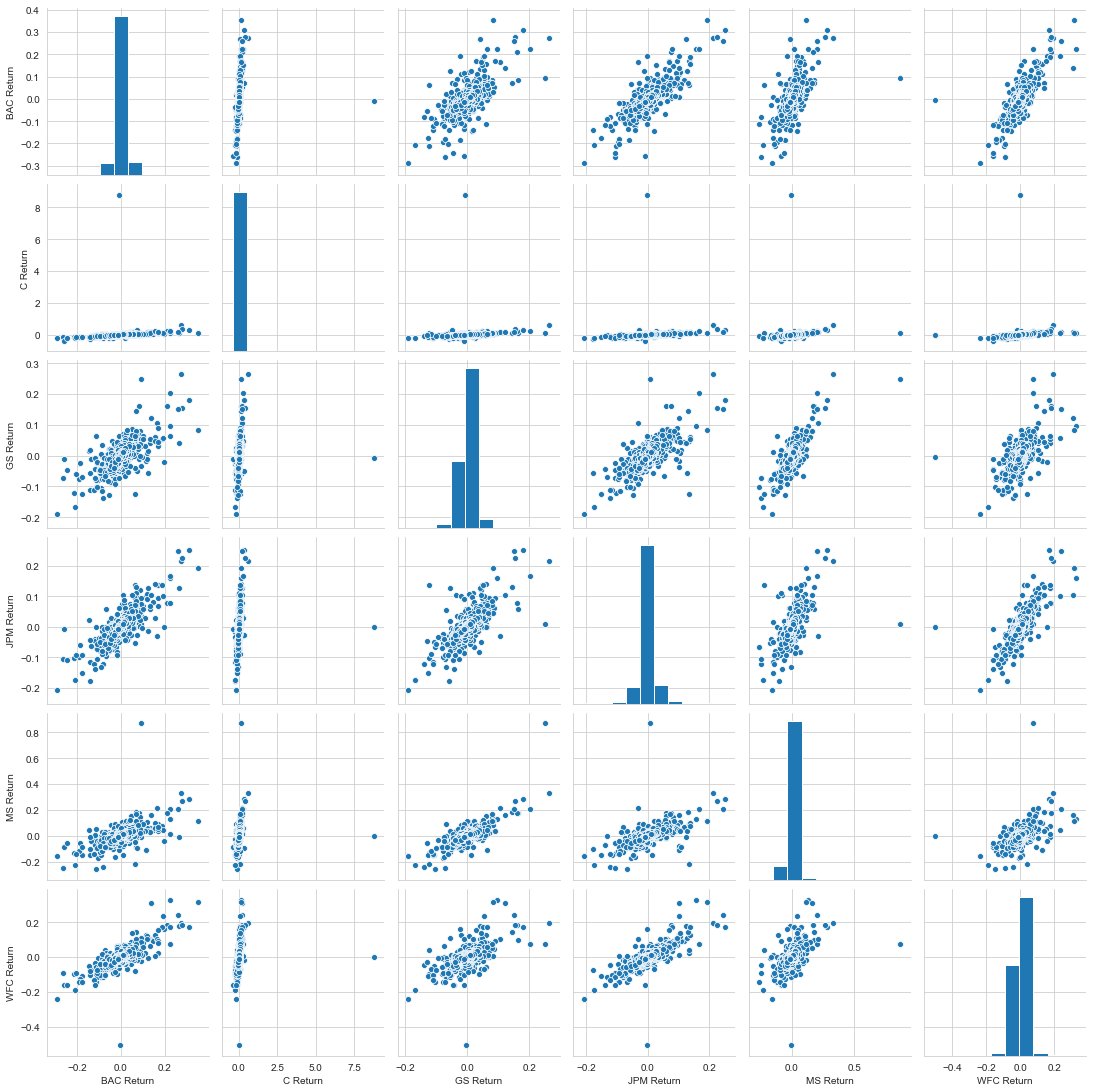

In [15]:
sns.set_style('whitegrid')
sns.pairplot(data=returns)

In [16]:
returns.describe()

,BAC Return,C Return,GS Return,JPM Return,MS Return,WFC Return
count,2516.000000,2516.000000,2516.000000,2516.000000,2516.000000,2516.000000
mean,0.000257,0.003337,0.000451,0.000575,0.000423,0.000458
std,0.036617,0.179065,0.025357,0.027651,0.037831,0.031841
min,-0.289694,-0.390244,-0.189596,-0.207274,-0.258929,-0.502084
25%,-0.011279,-0.011160,-0.010185,-0.009934,-0.012392,-0.008664
50%,0.000000,-0.000202,0.000368,0.000171,0.000261,0.000000
75%,0.010682,0.010713,0.011004,0.010054,0.012504,0.008837
max,0.352691,8.769912,0.264678,0.250967,0.869835,0.327645


***Self note:*** As of now, I cannot say for certain what's going on with the Citigroup behavior. What I can say is that it has similar quartiles as the other groups, but it also has a higher max return percent change value than the other banks.  
* C Return max = 8.76, while the second max return value is MS Return = 0.86
* It's standard deviation is higher than the other banks by a factor of around 5
  
It seems that, according to wikipedia, Citigroup was a MAJOR part of the 2007 Subprime mortgage crisis. So maybe this means that it lost more value, or faster, than the other banks.

**Using this returns DataFrame, figure out on what dates each bank stock had the best and worst single day returns. You should notice that 4 of the banks share the same day for the worst drop, did anything significant happen that day?**

In [17]:
pd.concat([returns.idxmin(), returns.idxmax()], axis=1, keys=['Worst Day', 'Best Day'])

,Worst Day,Best Day
BAC Return,2009-01-20,2009-04-09
C Return,2009-02-27,2011-05-09
GS Return,2009-01-20,2008-11-24
JPM Return,2009-01-20,2009-01-21
MS Return,2008-10-09,2008-10-13
WFC Return,2006-08-14,2008-07-16


**You should have noticed that Citigroup's largest drop and biggest gain were very close to one another, did anythign significant happen in that time frame?**

***Self note:*** It seems that the differences between the values strikes again, on the data provided by the course, the worst day for citigroup was on 2011-05-06. I found two news about the month of May and Citigroup:  
* [360000 accs hacked in may](https://www.reuters.com/article/us-citigroup-hacking/citi-says-360000-accounts-hacked-in-may-cyber-attack-idUSTRE75F17620110616), but this was uncovered later, so it's unlikelly to be the cause of the drop.  
* Citigroup [drastically shrunk its share count](https://www.wsj.com/articles/SB10001424052748704681904576313581047141782). In May 2011, Citigroup, which was still suffering from the fallout of the financial crisis, decided to [dramatically reduce its share count](https://www.thestreet.com/investing/stocks/citigroup-reverse-split-still-irks-shareholders-11904730) by turning every 10 shares into a single share. The stock that had been trading at 4.52 US dollars at the time, began to trade above 40 US dollars a share. In Citigroup's case, in allowing the stock to trade above $40, the management was hoping to shed penny stock traders and attract legitimate long-term investors. It was also intended as a signal that the crisis was behind the bank. The move, however, did not go down well with some retail investors who saw it as little more than window dressing.  
  
Also, according to [What Happened Today](https://www.onthisday.com/date/2009/january/20), on 2009-01-20 Barack Obama, inaugurated as the 44th President of the United States of America, becomes the United States' first African-American president.

**Take a look at the standard deviation of the returns, which stock would you classify as the riskiest over the entire time period? Which would you classify as the riskiest for the year 2015?**

In [18]:
returns.std()

BAC Return    0.036617
C Return      0.179065
GS Return     0.025357
JPM Return    0.027651
MS Return     0.037831
WFC Return    0.031841
dtype: float64

***Self note:*** I'd consider that the Citigroup stocks are the riskiest for the whole time period, as they have the higher standard deviation.

In [19]:
returns.loc[pd.to_datetime('2015-01-01'):pd.to_datetime('2016-01-01')].std()

BAC Return    0.016163
C Return      0.015289
GS Return     0.014046
JPM Return    0.014017
MS Return     0.016249
WFC Return    0.012591
dtype: float64

***Self note:*** for the year of 2015, the standard deviations are quite similar, being BAC and MS the higher standard deviation values.

**Create a distplot using seaborn of the 2015 returns for Morgan Stanley**

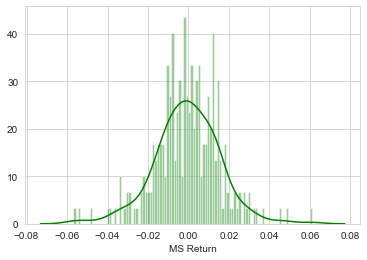

In [20]:
sns.distplot(returns['MS Return'].loc[pd.to_datetime('2015-01-01'):pd.to_datetime('2016-01-01')], bins=100, color='green')

**Create a distplot using seaborn of the 2008 returns for CitiGroup**

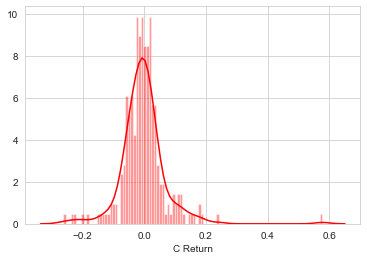

In [21]:
sns.distplot(returns['C Return'].loc[pd.to_datetime('2008-01-01'):pd.to_datetime('2009-01-01')], bins=100, color='red')

____
# More Visualization

A lot of this project will focus on visualizations. Feel free to use any of your preferred visualization libraries to try to recreate the described plots below, seaborn, matplotlib, plotly and cufflinks, or just pandas.

### Imports

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

# Optional Plotly Method Imports
import plotly
import cufflinks as cf
cf.go_offline()

**Create a line plot showing Close price for each bank for the entire index of time. (Hint: Try using a for loop, or use [.xs](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.xs.html) to get a cross section of the data.)**

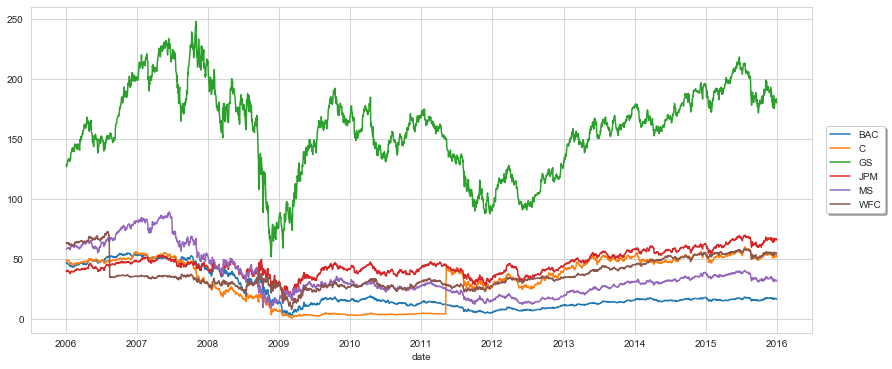

In [23]:
# Using Pandas
bank_stocks.xs(key='close', axis=1, level='Stock Info').plot(figsize=(14,6))
plt.legend(loc='center right', bbox_to_anchor=(1.1, 0.5), fancybox=True, shadow=True)

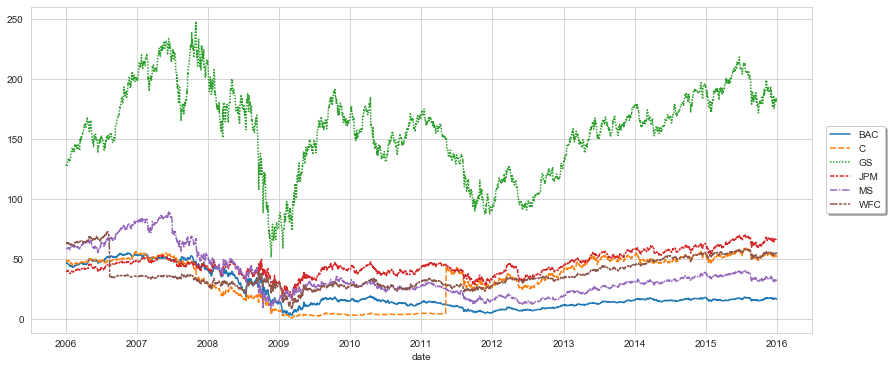

In [24]:
# Using Seaborn
plt.figure(figsize=(14,6))
sns.lineplot(data=bank_stocks.xs(key='close', axis=1, level='Stock Info'))
plt.legend(loc='center right', bbox_to_anchor=(1.1, 0.5), fancybox=True, shadow=True)

In [25]:
# Using PLOTLY
bank_stocks.xs(key='close', axis=1, level='Stock Info').iplot(xaxis_title="Date", yaxis_title="Stock Value")

## Moving Averages

Let's analyze the moving averages for these stocks in the year 2008. 

**Plot the rolling 30 day average against the Close Price for Bank Of America's stock for the year 2008**

In [26]:
start08=pd.to_datetime('2008-01-01')
end08=pd.to_datetime('2009-01-01')

Text(0.5, 0, 'Date')

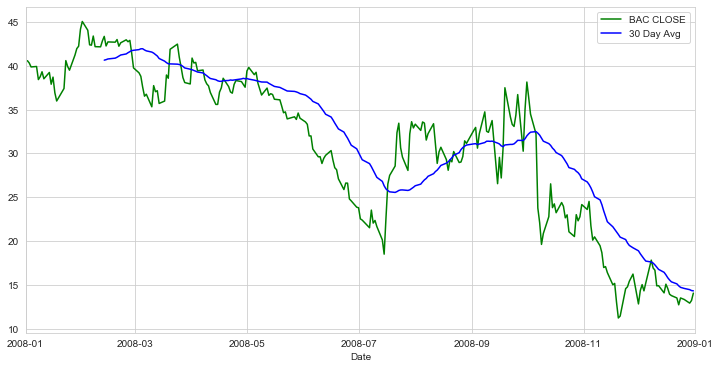

In [27]:
# We used the .rolling method, which is a method to Provide rolling window calculations.
# It groups information, much like groupby, but using a moving window.
plt.figure(figsize=(12,6))
sns.lineplot(data=bank_stocks['BAC']['close'].loc[start08:end08], color='green', label='BAC CLOSE')
sns.lineplot(data=bank_stocks['BAC']['close'].loc[start08:end08].rolling(window=30).mean(), color='blue', label='30 Day Avg')
plt.xlim((start08, end08))
plt.xlabel('Date')

**Create a heatmap of the correlation between the stocks Close Price.**

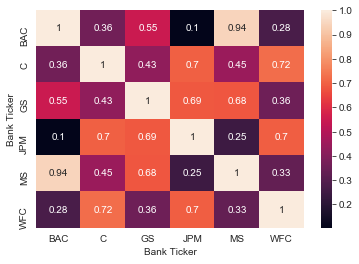

In [28]:
sns.heatmap(data=bank_stocks.xs(key='close', level='Stock Info', axis=1).corr(), annot=True)

**Optional: Use seaborn's clustermap to cluster the correlations together:**

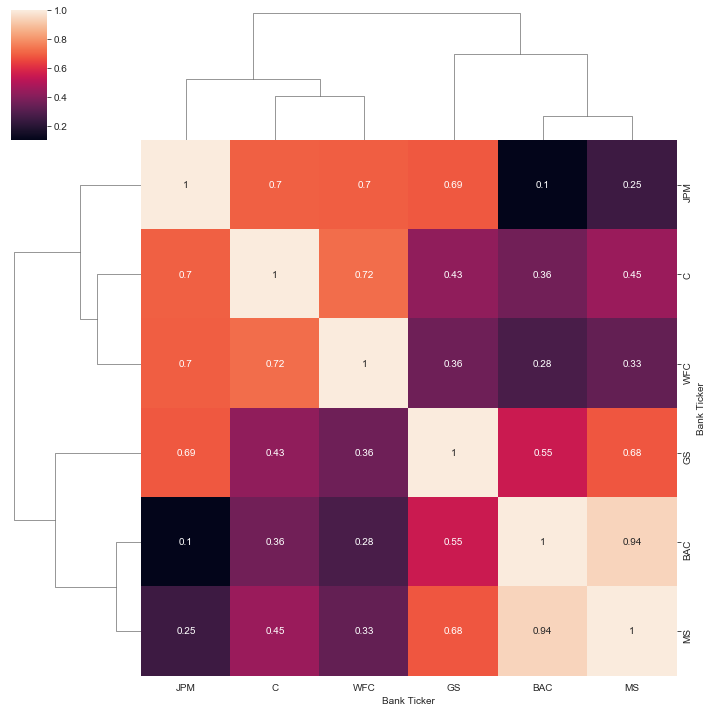

In [29]:
sns.clustermap(data=bank_stocks.xs(key='close', level='Stock Info', axis=1).corr(), annot=True)

In [30]:
bank_stocks.xs(key='close', level='Stock Info', axis=1).corr().iplot(kind='heatmap',colorscale='rdylbu')

# Part 2 (Optional)

In this second part of the project we will rely on the cufflinks library to create some Technical Analysis plots. This part of the project is experimental due to its heavy reliance on the cuffinks project, so feel free to skip it if any functionality is broken in the future.

**Use .iplot(kind='candle) to create a candle plot of Bank of America's stock from Jan 1st 2015 to Jan 1st 2016.**

In [31]:
start15=pd.to_datetime('2015-01-01')
end15=pd.to_datetime('2016-01-01')
bank_stocks['BAC'].loc[start15:end15].iplot(kind='candle', xaxis_title="Date", yaxis_title="Stock Value", title='BAC Stock Value - 2015')

**Use .ta_plot(study='sma') to create a Simple Moving Averages plot of Morgan Stanley for the year 2015.**

In [32]:
bank_stocks['MS']['close'].loc[start15:end15].ta_plot(study='sma')

**Use .ta_plot(study='boll') to create a Bollinger Band Plot for Bank of America for the year 2015.**

In [34]:
bank_stocks['BAC']['close'].loc[start15:end15].ta_plot(study='boll')

# Great Job!

Definitely a lot of more specific finance topics here, so don't worry if you didn't understand them all! The only thing you should be concerned with understanding are the basic pandas and visualization oeprations.